# CTC(8)_Rescaling, Decoding, Properties

## Rescaling
- CTC(7)까지 CTC의 핵심적인 설명을 마쳤다.
- 단, CTC 저자에 따르면 앞의 챕터 방식대로 전방확률과 후방확률을 계산하게 되면 그 값이 너무 작아져 언더플로(underflow)문제가 발생한다고 한다.
- 이에 수식24와 수식25와 같은 방식으로 전방확률과 후방확률 값을 리스케일링(rescaling)해준다.
- 그래디언트 역시 리스케일한 전방/후방확률을 기준으로 계산하게 된다. (원 논문 참조)

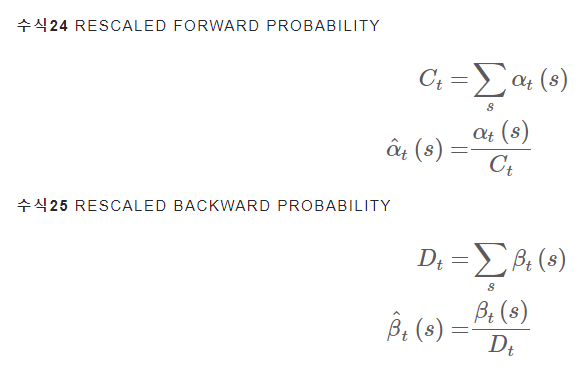

## Decoding
- CTC로 학습한 모델의 출력은 확률 베터 시퀀스이므로 그 결과를 적절히 디코딩(decoding)해 주어야 한다.
- 가장 간단한 방법은 Best Path Decoding 기법이다.
- 시간 축을 따라 가장 확률값이 높은 레이블을 디코딩 결과로 출력하는 방법이다.
- 그림14는 CTC로 학습한 모델이 출력한 확률 벡터 시퀀스를 시간 축을 따라 쭉 이어붙인 것이다.
- 가로축은 시간(time), 세로축은 음소를 나타낸다.
- 가로축을 보니 입력 음성 피처 시퀀스의 길이가 30
- Best Path Decoding 방식으로 그림14를 디코딩하면 '---B-OO--XXX-___--BBUUNN-NI--->'이 된다.

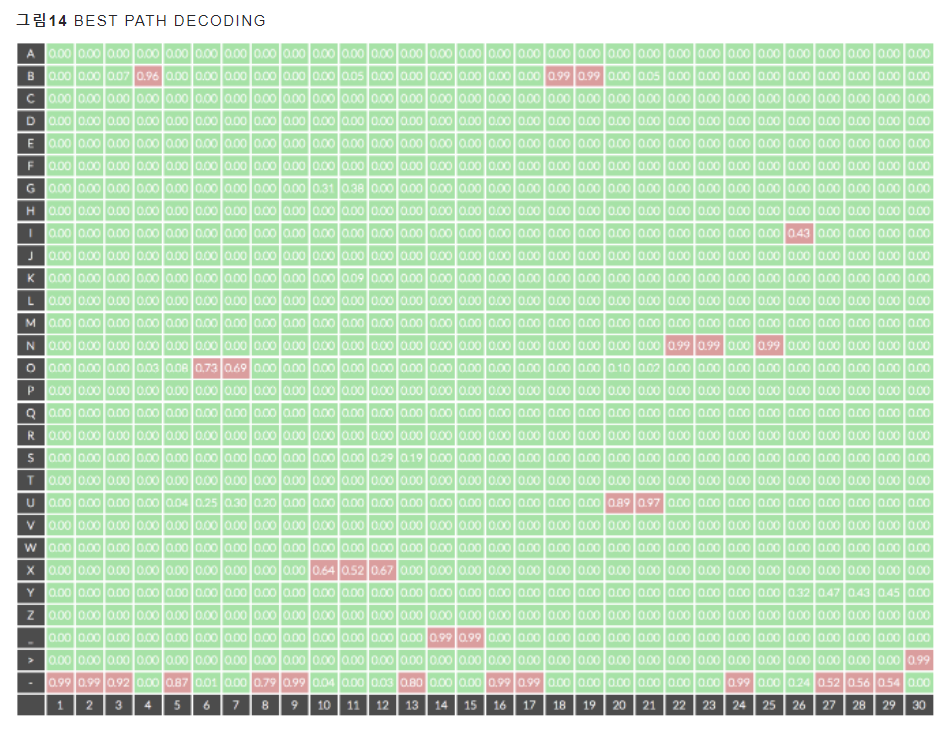

- **Prefix Decoding**은 매 스텝마다 가장 확률값이 높은 prefix를 디코딩 결과로 출력하는 것이다. (그림15)
- 그림15의 첫번째 스텝에서 가장 확률값이 높은 prefix는 x이다.
- 그런데 x의 확률값(0.7)은 두번째 스텝에서 각 샅애가 지니는 확률의 합($p(X) = 0.1$, $p(Y) = 0.5$, $p(e) = 0.1$)과 같다.
- x의 확률값(0.7)은 $t = 1$ 시점에 상태가 x일 확률을 가리킨다.
- 앞서 설명한 Forward/Backward Algorithm으로 계산가능하다.
- 그림15와 같은 예시일 때 Prefix Decoding 겨로가는 XYe가 된다.


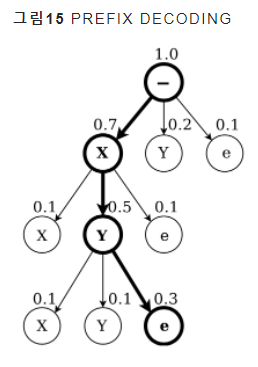

- **Beam Search**는 매 스텝마다 가장 확률이 높은 후보 시퀀스를 bean 크기만큼 남겨서 디코딩하는 방법이다.
- 그림16은 beam 크기가 3일 때 Beam Search의 일반적인 디코딩 과정을 도식적으로 나타내고 있다.
- 시간이 아무리 흘러도 살아남는 후보 시퀀스 갯수는 beam의 크기가 된다.
- 그림17과 그림18은 CTC로 학습한 모델의 Beam Search 과정을 나타낸다.
- 일반적인 Beam Search와 거의 유사하나 디코딩 과정에서 여러 번 등장한 음소를 합치거나 blank등을 적절히 처리해 준다.

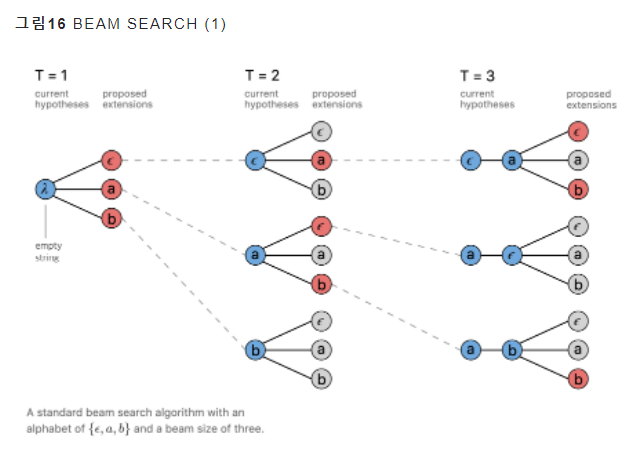

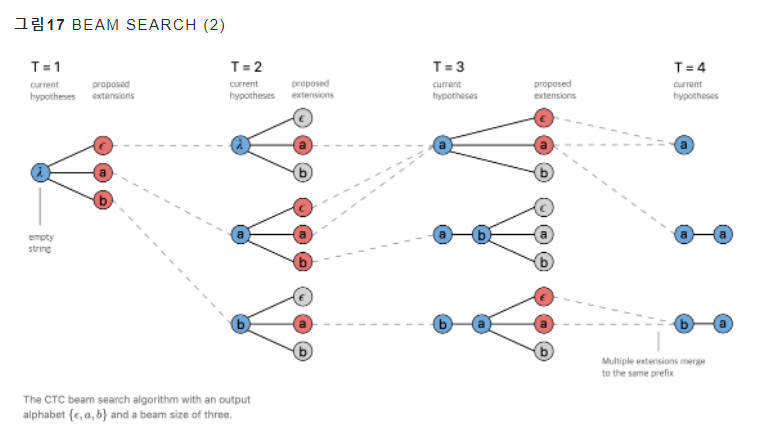

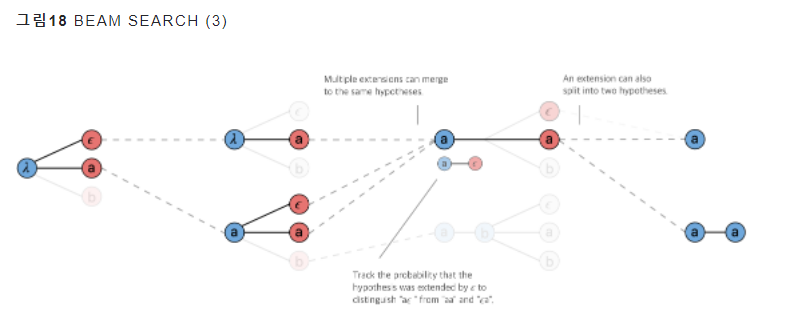

## Properties
- 그림19는 프레임 단위 레이블로 학습한 음성 인식 모델과 CTC로 학습한 모델 간 차이를 나타내는 그림으로 CTC 원저자가 작성한 것이다.
- 저자에 따르면 dh라는 음소의 경우 프레임 단위 모델은 정답을 잘 맞췄지만 다른 음소와의 구분이 잘 되지 않았다.
- 그에 반해 CTC 모델은 구분이 잘 되어 있는 것을 확인할 수 있다.
- 아울러 CTC 모델은 프레임 단위 모델 대비 음소 확률 분포가 뽀족(spiky)하고 희소(sparse)하다.

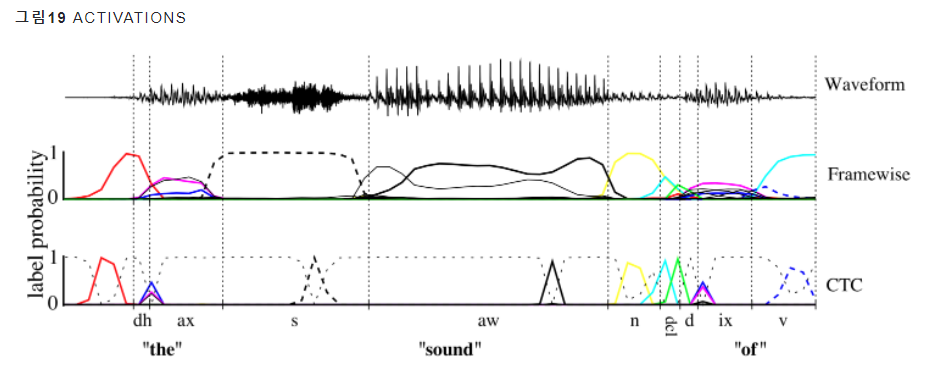

- 하지만 개인적으로는 그림19가 역설적이게도 CTC 모델의 단점을 드러낸 모델이 아닌가 싶다.
- 입력 음성 피처 시퀀스별로 레이블을 부여(Forced Alignment)하는 태스크에는 CTC가 제대로 작동하지 않을 염려가 있다고 생각되기 때문이다.
- 실제로 CTC 모델이 s음소를 인식 결과로 리턴할 수 있는 구간은 프레임 단위 모델 대비 짧은 편이다.